In [1]:
%load_ext autoreload

In [2]:
# Standard dist imports
import logging

# Third party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Project level imports
from SalaryPredictionPortfolio.salary_helpers import read_in_dataset, merge_dataset
from SalaryPredictionPortfolio.utils.config import opt
from SalaryPredictionPortfolio.visualization.visualize import plot_feature, plot_target
from SalaryPredictionPortfolio.utils.genericconstants import SalaryConstants as Const

Categorical columns: 'jobType', 'degree', 'major', 'industry'

Numerical columns: 'yearsExperience', 'milesFromMetropolis'


Focus on getting a high level of the dataset in the very beginning.

In [3]:
print('\n1.')
train_feat_df = read_in_dataset(dset='train_features.csv', raw=True, verbose=True)
print('\n\n\n2.')
train_sal_df = read_in_dataset(dset='train_salaries.csv', raw=True, verbose=True)
train_df = merge_dataset(train=train_feat_df, salaries=train_sal_df)
print('\n\n\n3.')
test_feat_df = read_in_dataset(dset='test_features.csv', raw=True, verbose=True)


1.

****************** Reading in the train_features.csv dataset *******************

it has 1000000 rows and 8 columns

************************* It has the following columns *************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
None

*********************** The first 5 rows look like this ************************

              jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COM

### Check for duplicates

In [4]:
assert 0 == train_feat_df.duplicated().sum()
assert 0 == train_sal_df.duplicated().sum()
assert 0 == test_feat_df.duplicated().sum()

### Numerical and Categorical Variables

In [5]:
# numerical
train_feat_df.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [6]:
# categorical
train_feat_df.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684568791,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


### Visualize Target Variable (Salary)
This is a pretty normal distribution, which works out for us bc we know what to expect.

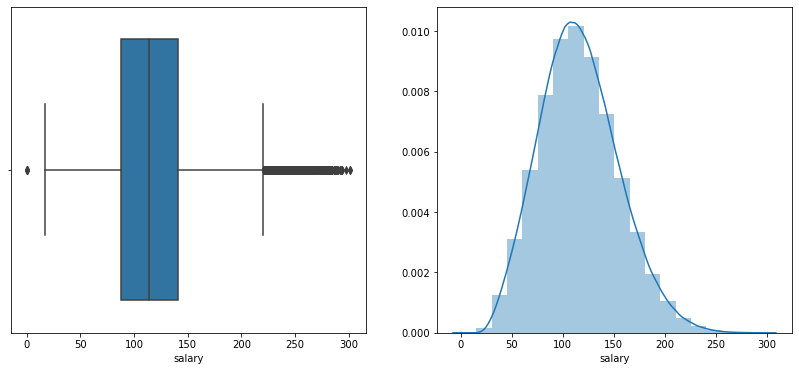


*********************** Reviewing target variable salary************************
count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64


In [7]:
plot_target(train_df, target_col='salary')

### Examine Outliers

In [8]:
def examine_outliers(df, column):
    stat = df[column].describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5*IQR
    lower = stat['25%'] - 1.5*IQR
    print(f'\nThe upper and lower bounds for suspected outliers are {upper} and {lower}')

examine_outliers(train_df, column='salary')

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

The upper and lower bounds for suspected outliers are 220.5 and 8.5


In [9]:
# check potential outlier below lower bound
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [10]:
#check potential outlier above upper bound
train_df.loc[train_df.salary > 222.5, 'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [11]:
# Check most suspicious potential outliers above upper bound
train_df[(train_df.salary > 222.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


Points below the lowerbound appear to be missing or corrupt data, so we can go ahead with removing it.

On the other hand, the upperbound points appear to be legitimate, since the data corresponds with our basic knowledge of salaries within the oil and finance industry.

In [12]:
train_df = train_df[train_df.salary > 8.5]

## Plot Features

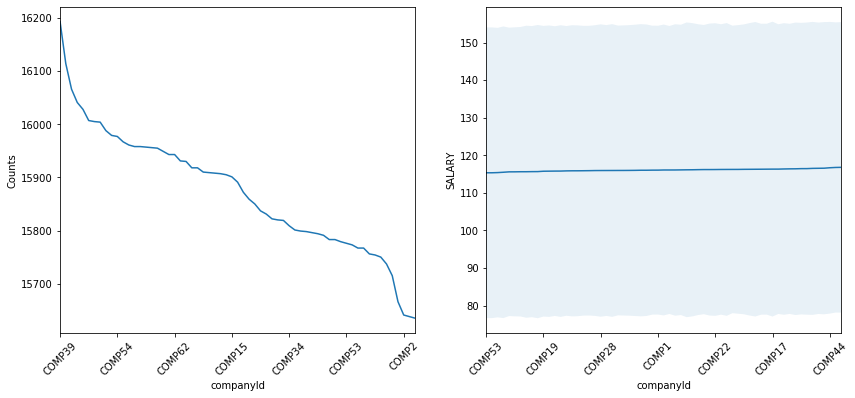

In [13]:
plot_feature(train_df, 'companyId', 'salary')

#### The salary is weakly associated with companies

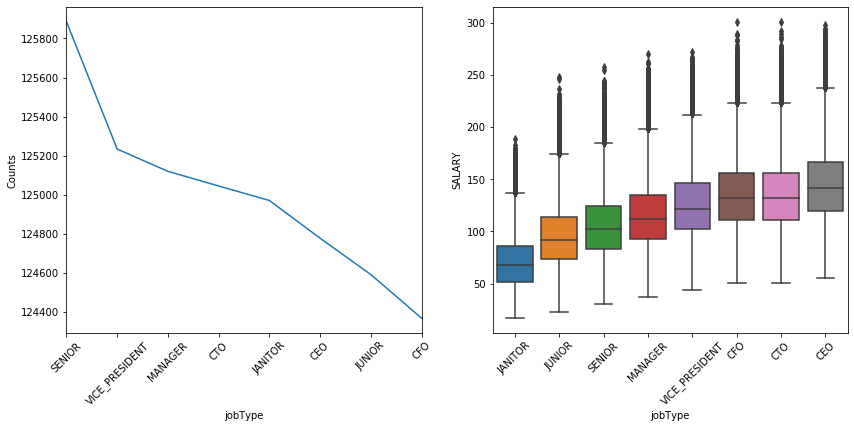

In [14]:
plot_feature(train_df, 'jobType', 'salary')

#### There is a clear positive correlation between job type and salary.

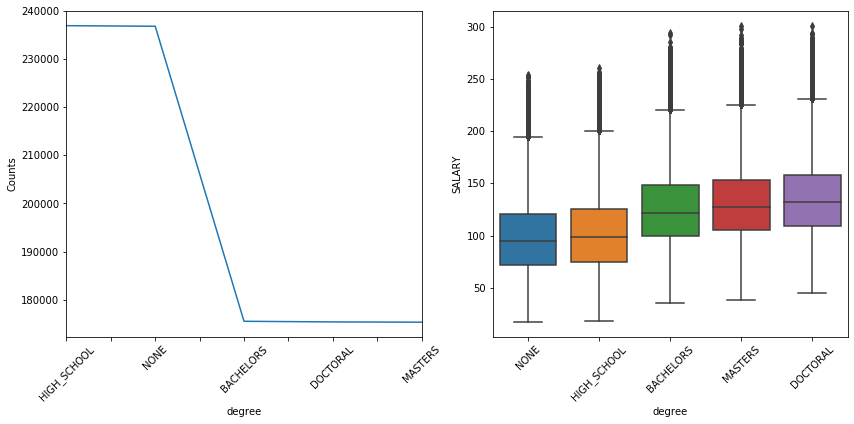

In [15]:
plot_feature(train_df, 'degree', 'salary')

#### More advanced degrees tend to correspond to higher salaries.

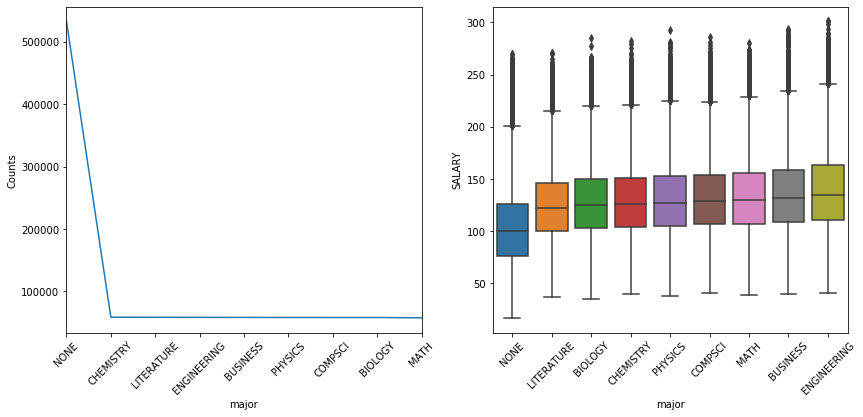

In [16]:
plot_feature(train_df, 'major', 'salary')

#### People with majors of engineering, business and math generally have higher salaries.

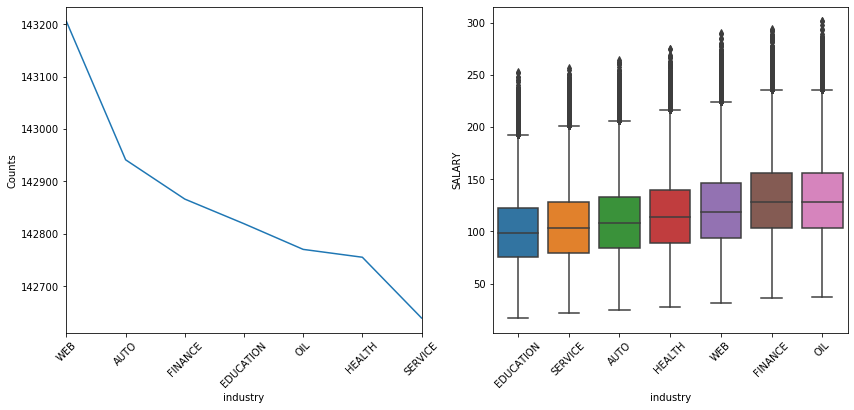

In [17]:
plot_feature(train_df, 'industry', 'salary')

#### As for industries, oil, finance and web industries generally pay better.

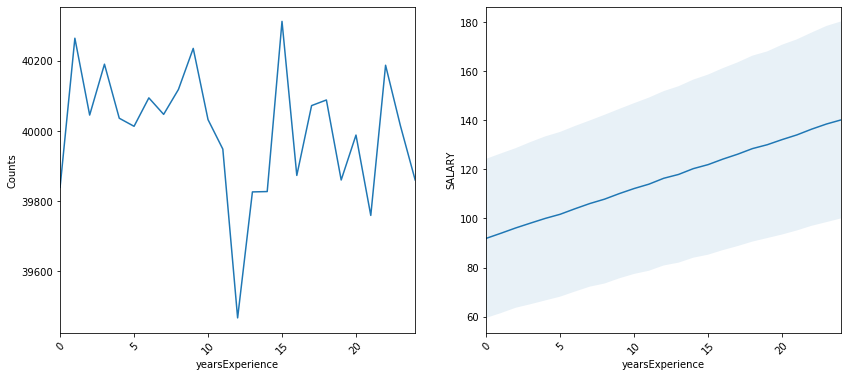

In [18]:
plot_feature(train_df, 'yearsExperience', 'salary')

#### In general, there is a clear correlation between salary and years of experience.

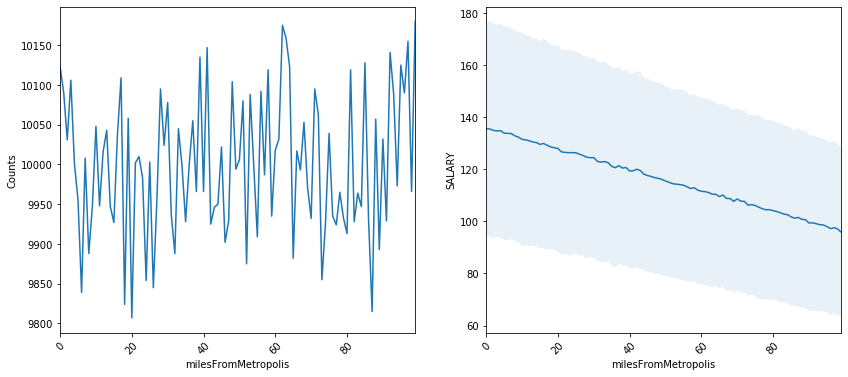

In [19]:
plot_feature(train_df, 'milesFromMetropolis', 'salary')

#### In general, salaries decrease with the distance to metropolis.

### Salary(Company, nJobs) Relationship
According to this distribtution, we see a fairly multimodal distribution for the number of jobs per company.
We see the modes near the first and second quartile, which informs that company size may play a role in the salary.

Based off of this, it would seem that there's not much differentiation of salary per company. The variance in average salary is marginal. Normally, we would assume that given a company, there would be some variance in salary, but this isn't the case


***************************** Reviewing companyId ******************************


/Users/ktl014/miniconda3/envs/sal_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


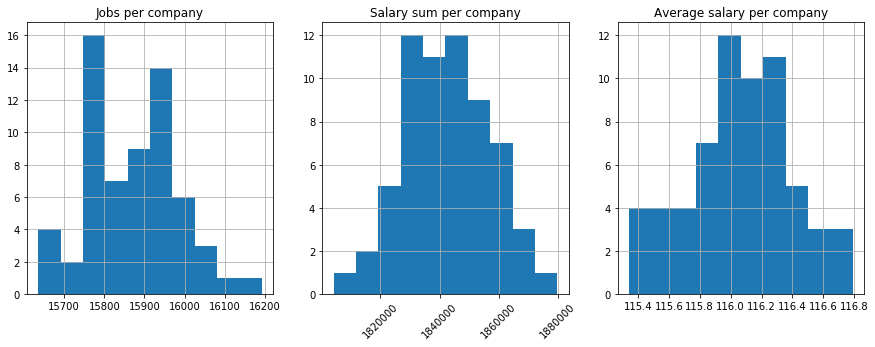


Jobs per company statistics
count       63.000000
mean     15872.936508
std        116.133804
min      15635.000000
25%      15787.000000
50%      15891.000000
75%      15956.500000
max      16193.000000
Name: jobId, dtype: float64

63 unique companies

Salary per company statistics
Minimum salary per company: AVG:20.30 MIN:17.00 MAX:24.00
Maximum salary per company: AVG:280.44 MIN:263.00 MAX:301.00


In [20]:
print('\n{0:*^80}'.format(' Reviewing companyId '))

fig1, axar = plt.subplots(1, 3, figsize=(15,5))

jobs_per_company = train_df.groupby(Const.company_id)[Const.job_id]
salary_per_company = train_df.groupby(Const.company_id)['salary'].agg({'B': ['min', 'max'], 'C': 'sum', 'D': 'mean'})

pd.Series(jobs_per_company.nunique()).hist(ax=axar[0]); axar[0].set_title('Jobs per company');
pd.Series(salary_per_company[('C', 'salary')]).hist(ax=axar[1]); axar[1].tick_params(axis='x', rotation=45); axar[1].set_title('Salary sum per company');
pd.Series(salary_per_company[('D', 'salary')]).hist(ax=axar[2]); axar[2].set_title('Average salary per company');
plt.show()

print('\nJobs per company statistics')
print(pd.Series(jobs_per_company.nunique()).describe())

print('\n{} unique companies'.format(train_df[Const.company_id].nunique()))
# print(train_df[Const.company_id].value_counts())

print('\nSalary per company statistics')

min_sal = salary_per_company[('B', 'min')].describe()
print('Minimum salary per company: AVG:{:0.2f} MIN:{:0.2f} MAX:{:0.2f}'.format(min_sal['mean'], min_sal['min'], min_sal['max']))

max_sal = salary_per_company[('B', 'max')].describe()
print('Maximum salary per company: AVG:{:0.2f} MIN:{:0.2f} MAX:{:0.2f}'.format(max_sal['mean'], max_sal['min'], max_sal['max']))

## Correlation between features

In [21]:
def encode_label(df, col):
    #encode the categories using average salary for each category to replace label
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = df[df[col] == cat]['salary'].mean()   
    df[col] = df[col].map(cat_dict)
    df[col] = df[col].astype('int64')
    return df

In [22]:
for col in train_df.columns:
    if train_df[col].dtype.name == "category":
        train_df = encode_label(train_df, col)
        

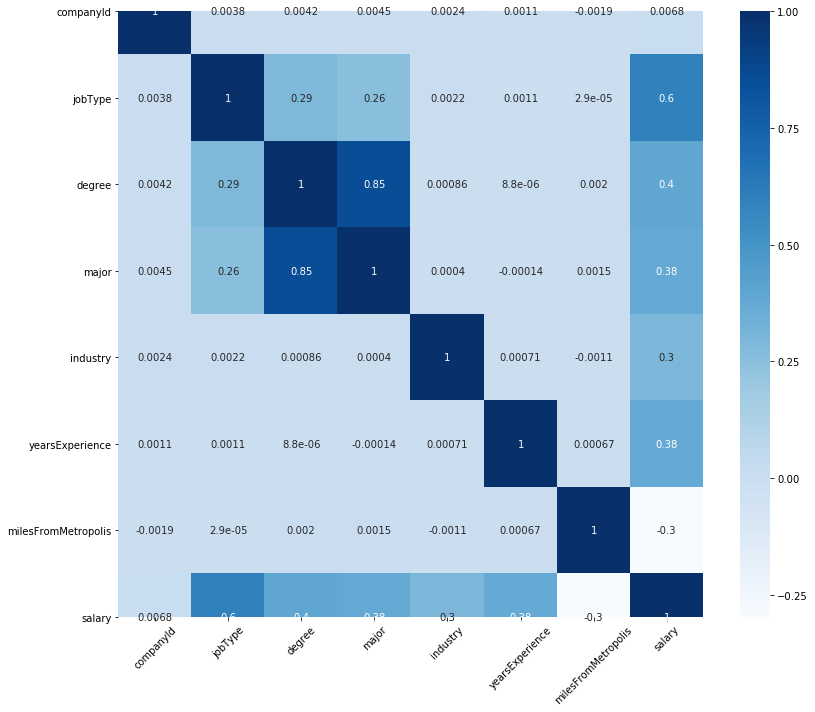

In [23]:
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df[features + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Correlations: jobType is strongly correlated with salary, followed by degree, major and yearsExperience.

Then, jobType has a moder correlation with both degree and major.